(120, 1772)
(120, 1772)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 

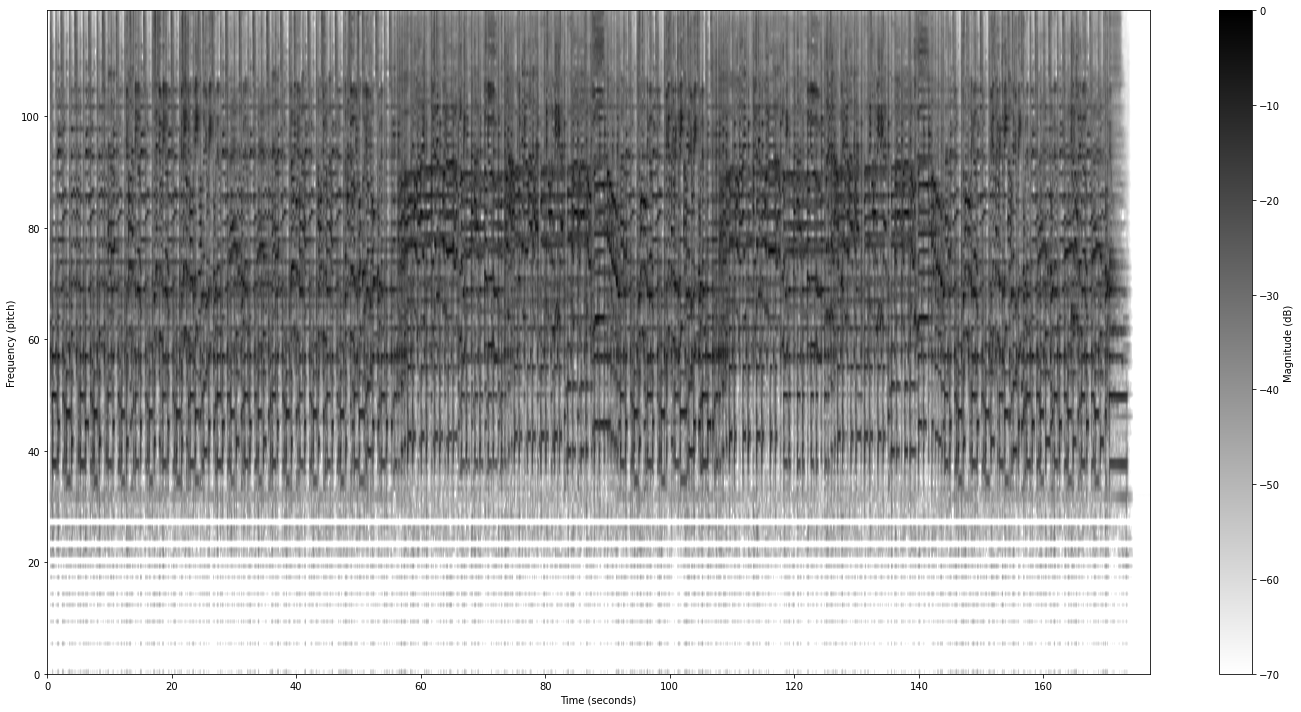

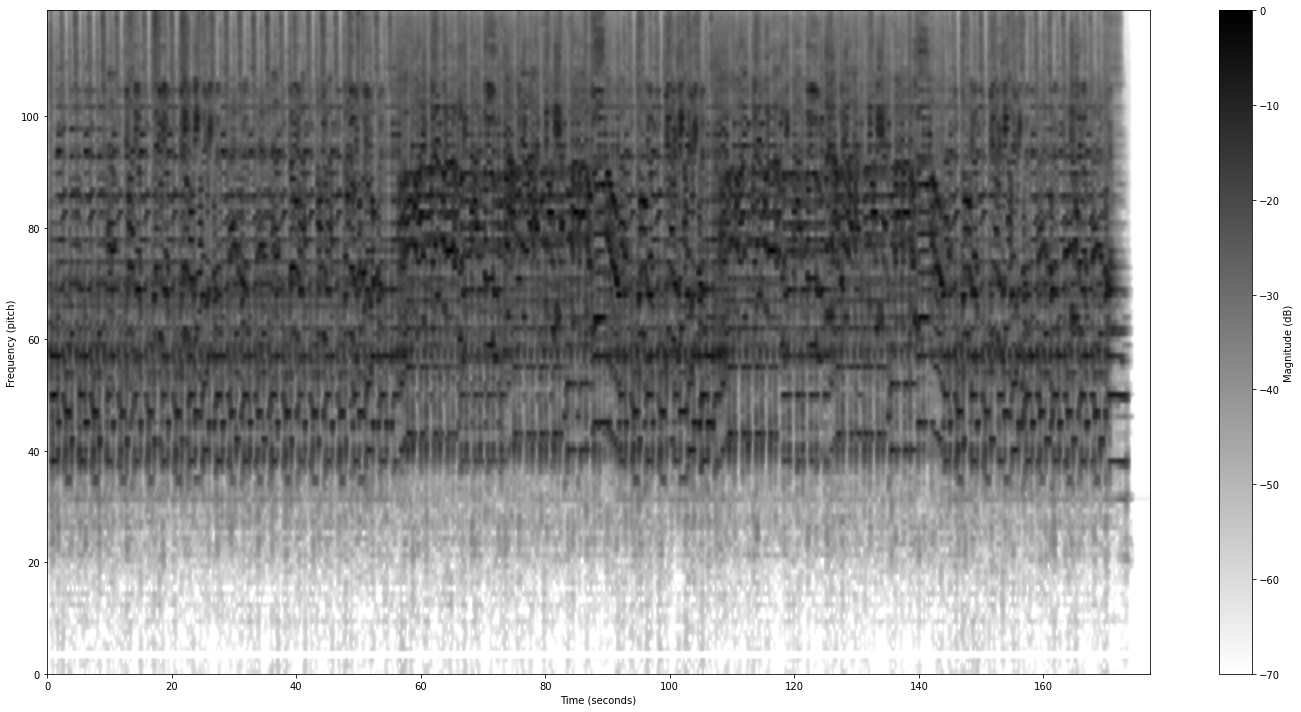

In [2]:
import os
import matplotlib
from matplotlib import pyplot as plt
import librosa
import FeatureExtractor as FE
%matplotlib inline

# Load wav
fn_wav = os.path.join('..', 'FMP_1.2.2', 'data', 'C3', 'FMP_C3_F03.wav')
#x, Fs = librosa.load(fn_wav, sr=22050)
x, Fs = librosa.load("Beatles Songs/Please Please Me/Anna (Go To Him).wav")

shortData, longData = FE.generateSpectrogram(x, Fs)

fig = plt.figure(figsize=(20, 10))
plt.imshow(shortData[0], origin='lower', aspect='auto', cmap='gray_r', extent=[shortData[2][0], shortData[2][-1], 0, 119])

#plt.ylim([21, 108])
plt.clim([-70, 0])
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (pitch)')
cbar = plt.colorbar()
cbar.set_label('Magnitude (dB)')
plt.tight_layout()

fig = plt.figure(figsize=(20, 10))
plt.imshow(longData[0], origin='lower', aspect='auto', cmap='gray_r', extent=[longData[2][0], shortData[2][-1], 0, 119])

#plt.ylim([21, 108])
plt.clim([-70, 0])
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (pitch)')
cbar = plt.colorbar()
cbar.set_label('Magnitude (dB)')
plt.tight_layout()


print(shortData[0].shape)
print(longData[0].shape)

print(shortData[1])
print(longData[1][:50])

print(shortData[2][:50])
print(longData[2][:50])

print(shortData[0][:,30])

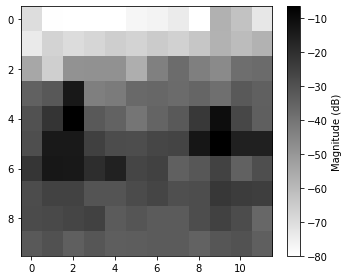

In [14]:
import numpy as np
res = np.reshape(longData[0][:,1710], (10, 12))
#print(res)
fig = plt.figure(figsize=(5, 4))
plt.imshow(res, aspect='auto', cmap='gray_r')

#plt.ylim([21, 108])
cbar = plt.colorbar()
cbar.set_label('Magnitude (dB)')
plt.tight_layout()


In [9]:
a = np.arange(25).reshape(5,5)
print(a)
print()
print(np.pad(a, 2, mode='wrap')[2:-2,:])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

[[ 3  4  0  1  2  3  4  0  1]
 [ 8  9  5  6  7  8  9  5  6]
 [13 14 10 11 12 13 14 10 11]
 [18 19 15 16 17 18 19 15 16]
 [23 24 20 21 22 23 24 20 21]]


In [23]:
import torch
import torch.nn.functional as F
a = torch.randint(0, 36, (2, 2, 3, 3))
print(a)

print(F.pad(a, (2, 2, 0, 0), mode='circular'))


tensor([[[[26, 29,  6],
          [17, 17, 31],
          [10, 19, 26]],

         [[13,  5, 31],
          [32, 26, 18],
          [34,  3, 28]]],


        [[[ 0, 31, 15],
          [13, 25, 27],
          [28, 11,  1]],

         [[ 7, 23, 22],
          [35, 25,  7],
          [ 6, 15, 28]]]])
tensor([[[[29,  6, 26, 29,  6, 26, 29],
          [17, 31, 17, 17, 31, 17, 17],
          [19, 26, 10, 19, 26, 10, 19]],

         [[ 5, 31, 13,  5, 31, 13,  5],
          [26, 18, 32, 26, 18, 32, 26],
          [ 3, 28, 34,  3, 28, 34,  3]]],


        [[[31, 15,  0, 31, 15,  0, 31],
          [25, 27, 13, 25, 27, 13, 25],
          [11,  1, 28, 11,  1, 28, 11]],

         [[23, 22,  7, 23, 22,  7, 23],
          [25,  7, 35, 25,  7, 35, 25],
          [15, 28,  6, 15, 28,  6, 15]]]])


In [20]:
import numpy as np
a = np.arange(20).reshape(4,5)
b = np.arange(20).reshape(4,5) + 10
print(a)
print(b)
c = np.array([a, b])
print(c)
print(c.shape)

d = np.transpose(c, (1, 2, 0))
print()
print(d)
print(d.shape)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[[10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]]

 [[10 11 12 13 14]
  [15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]]
(2, 4, 5)

[[[ 0 10]
  [ 1 11]
  [ 2 12]
  [ 3 13]
  [ 4 14]]

 [[ 5 15]
  [ 6 16]
  [ 7 17]
  [ 8 18]
  [ 9 19]]

 [[10 20]
  [11 21]
  [12 22]
  [13 23]
  [14 24]]

 [[15 25]
  [16 26]
  [17 27]
  [18 28]
  [19 29]]]
(4, 5, 2)
